<a href="https://colab.research.google.com/github/aksanaboo/sephora/blob/main/SephoraEDAPart4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
#datasets
product = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/product_info.csv')
review_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_0-250.csv')
review_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_250-500.csv')
review_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_500-750.csv')
review_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_750-1250.csv')
review_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_1250-end.csv')

<ipython-input-3-e4867818210a>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_0-250.csv')
<ipython-input-3-e4867818210a>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_750-1250.csv')
<ipython-input-3-e4867818210a>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews_1250-end.csv')


In [4]:
df = [review_1,review_2,review_3,review_4,review_5]

In [5]:
review = pd.concat(df,axis=0)

In [6]:
review.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [7]:
sephora_data = review[['author_id','product_id','product_name','rating','submission_time']]

In [8]:
sephora_data.head()

,author_id,product_id,product_name,rating,submission_time
0,1741593524,P504322,Gentle Hydra-Gel Face Cleanser,5,2023-02-01
1,31423088263,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,1,2023-03-21
2,5061282401,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,5,2023-03-21
3,6083038851,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,5,2023-03-20
4,47056667835,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,5,2023-03-20


In [9]:
sephora_data.shape

(1094411, 5)

In [10]:
sephora_data.dtypes

author_id          object
product_id         object
product_name       object
rating              int64
submission_time    object
dtype: object

In [11]:
sephora_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094411 entries, 0 to 49976
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   author_id        1094411 non-null  object
 1   product_id       1094411 non-null  object
 2   product_name     1094411 non-null  object
 3   rating           1094411 non-null  int64 
 4   submission_time  1094411 non-null  object
dtypes: int64(1), object(4)
memory usage: 50.1+ MB


In [12]:
sephora_data.describe()

,rating
count,1.094411e+06
mean,4.299158e+00
std,1.149444e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [13]:
sephora_data['rating'].value_counts()

5    698951
4    199389
3     81816
1     61223
2     53032
Name: rating, dtype: int64

In [14]:
sephora_data.isnull().sum()

author_id          0
product_id         0
product_name       0
rating             0
submission_time    0
dtype: int64

In [15]:
sephora_data.duplicated().sum()

960

In [17]:
#remove duplicates
sephora_data.drop_duplicates(inplace=True)

<ipython-input-17-aacc65b04d05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sephora_data.drop_duplicates(inplace=True)


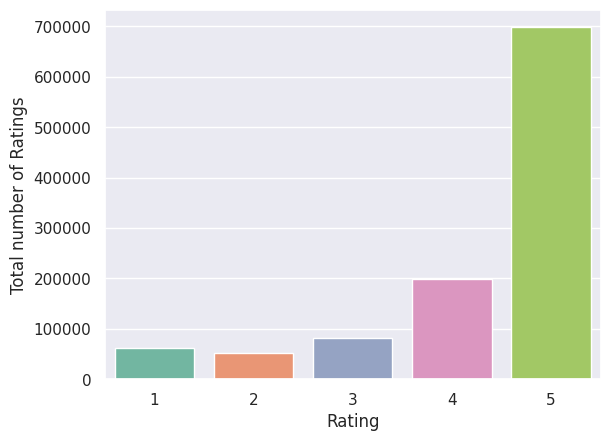

In [19]:
#Rating distribution
sns.set(style='darkgrid')
sns.countplot(data=sephora_data,x='rating',palette='Set2')
plt.xlabel('Rating')
plt.ylabel('Total number of Ratings')
plt.show()

In [21]:
sephora_data['author_id'] = sephora_data['author_id'].astype(str)

<ipython-input-21-7fce8292cddf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sephora_data['author_id'] = sephora_data['author_id'].astype(str)


In [22]:
#Unique Users and Products
print('Total Data:')
print('-'*50)
print('Total number of ratings:',sephora_data.shape[0])
print('Total number of users:',len(np.unique(sephora_data['author_id'])))
print('Total number of products',len(np.unique(sephora_data['product_id'])))

Total Data:
--------------------------------------------------
Total number of ratings: 1093451
Total number of users: 503216
Total number of products 2351


In [23]:
sephora_data.drop(columns=['submission_time'],axis=1,inplace=True)

<ipython-input-23-af94f956dfad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sephora_data.drop(columns=['submission_time'],axis=1,inplace=True)


In [25]:
#Analysing Rating
no_of_rated_products_per_user = sephora_data.groupby(by='author_id')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

author_id
1696370280    292
1288462295    209
1930716686    155
7375781965    154
2330399812    151
Name: rating, dtype: int64

In [30]:
no_of_rated_products_per_user = pd.DataFrame(no_of_rated_products_per_user)

In [33]:
no_of_rated_products_per_user.reset_index(inplace=True)

In [34]:
no_of_rated_products_per_user.rename(columns={'rating':'Rating Count'})

,author_id,Rating Count
0,1696370280,292
1,1288462295,209
2,1930716686,155
3,7375781965,154
4,2330399812,151
...,...,...
503211,23325746212,1
503212,23325715867,1
503213,23325714959,1
503214,23325712637,1


In [35]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<ipython-input-35-ecbc46163ba1>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')


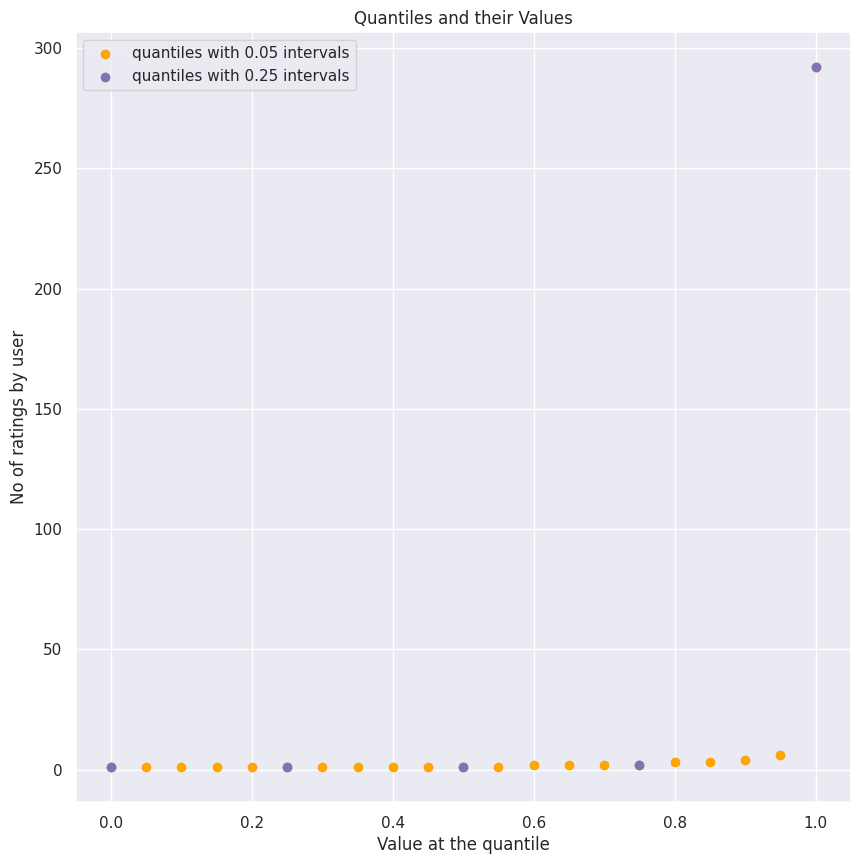

In [38]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

## Popularity Based recommendation

In [39]:
#new_df which contains users that have given 50 or more raitings
new_df=sephora_data.groupby("product_id").filter(lambda x:x['rating'].count() >=50)

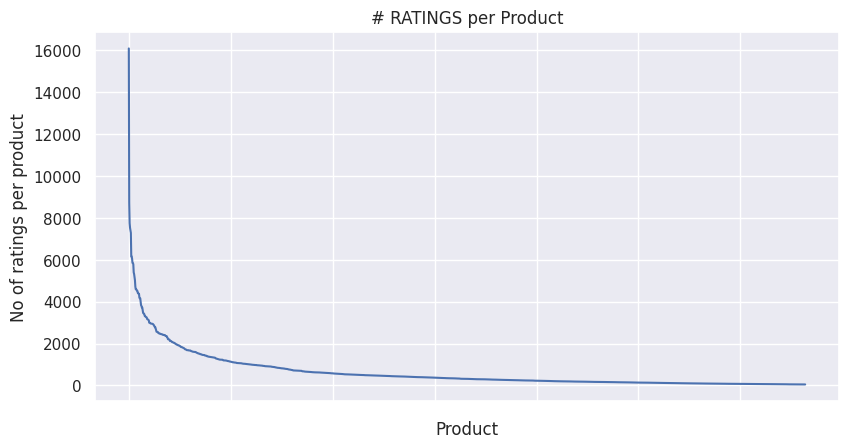

In [41]:
no_of_ratings_per_product = new_df.groupby(by='product_id')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [43]:
#Average rating of the product
new_df.groupby('product_id')['rating'].mean().head()

product_id
P107306    4.031621
P114902    4.422120
P12045     4.443654
P122651    4.515152
P122661    4.524467
Name: rating, dtype: float64

In [45]:
ratings_mean_count = pd.DataFrame(new_df.groupby('product_id')['rating'].mean())

In [47]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('product_id')['rating'].count())

In [52]:
ratings_mean_count.reset_index(inplace=True)

In [53]:
ratings_mean_count.head()

,product_id,rating,rating_counts
0,P107306,4.031621,253
1,P114902,4.422120,1528
2,P12045,4.443654,1686
3,P122651,4.515152,198
4,P122661,4.524467,797


In [54]:
ratings_mean_count['rating_counts'].max()

16095

In [55]:
ratings_mean_count['rating_counts'].min()

50

<Axes: >

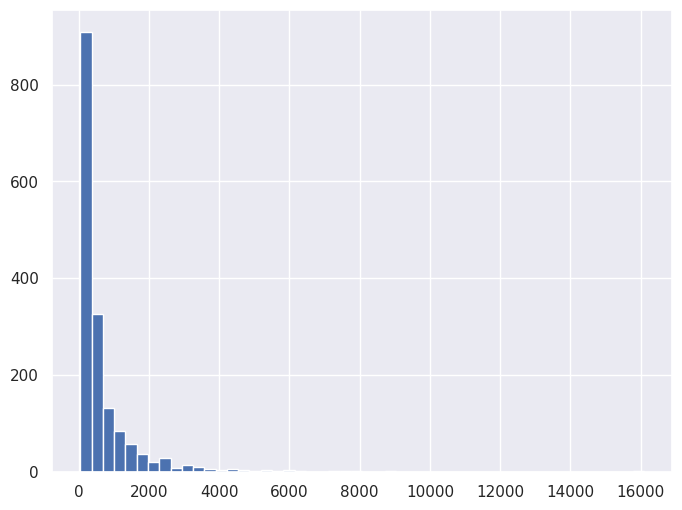

In [56]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Axes: >

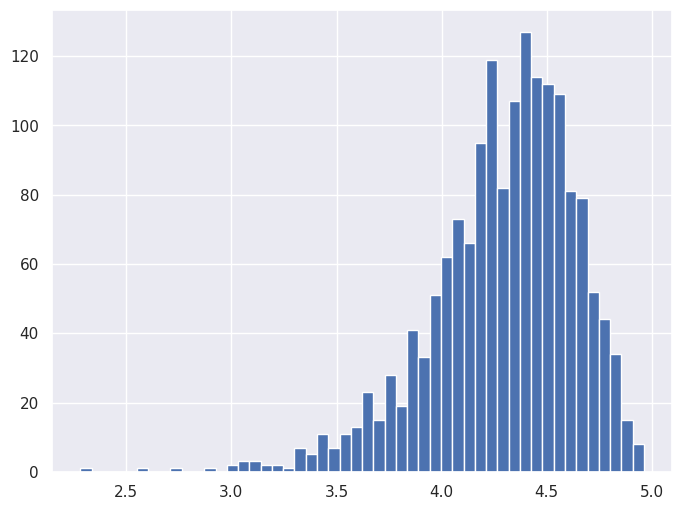

In [58]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 800x600 with 0 Axes>

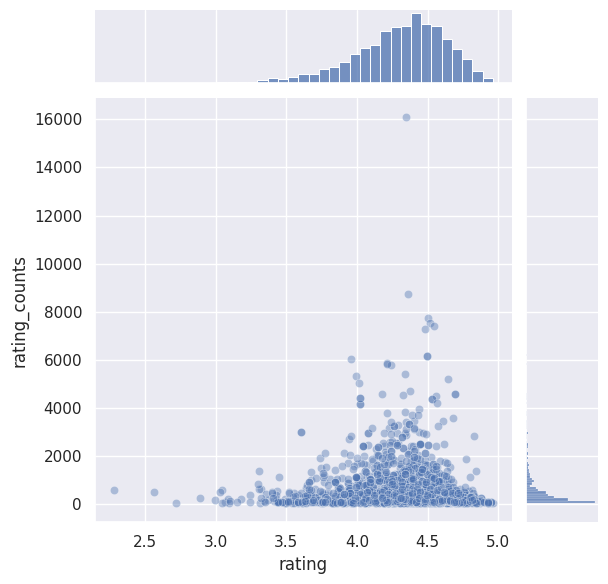

In [60]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

<Axes: xlabel='product_id'>

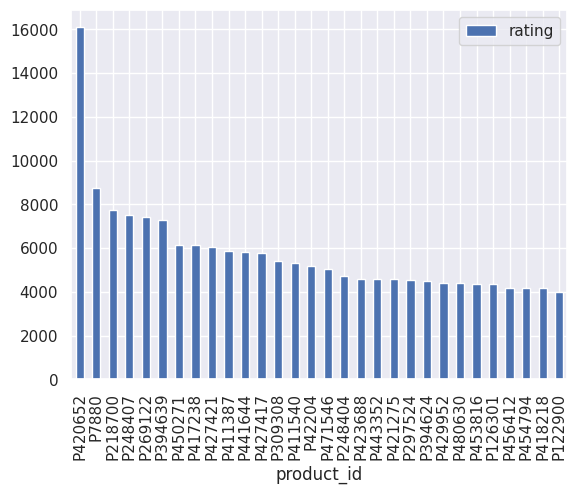

In [63]:
popular_products = pd.DataFrame(new_df.groupby('product_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar")